In [20]:
update.packages("lavaan")
library("lavaan")

In [21]:
data.CFA = read.delim("cfa.txt")
data.CFA = data.CFA[,1:10]
head(data.CFA)
names(data.CFA)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,6,6,6,5,6,6,6,6,5,6
2,7,6,6,6,4,4,4,5,4,5
3,4,6,5,5,5,5,5,4,5,6
4,6,5,5,6,4,4,4,4,4,5
5,3,5,4,5,5,3,3,3,2,3
6,6,6,6,6,5,5,5,6,6,6


[1] "x1"  "x2"  "x3"  "x4"  "x5"  "x6"  "x7"  "x8"  "x9"  "x10"

Hipotesa yang diangkat adalah sebagai berikut :

H1 : Kualitas layanan berkontribusi terhadap kepuasan nasabah

H2 : Penanganan komplain berkontribusi terhadap kepuasan nasabah

H3 : Citra berkontribusi terhadap kepuasan nasabah

atau dengan kata lain bahwa kepuasan nasabah direpresentasikan oleh kualitas layanan, Penanganan komplain dan Citra
![image](https://user-images.githubusercontent.com/36166387/79945752-b7b1ce00-8498-11ea-96d4-772842a211fe.png)

In [22]:
SecondCFA = 'Kepuasan nasabah =~ Kualitas_layanan + Penanganan_komplain + citra
        Kualitas_layanan =~ x1 + x2 + x3 + x4 
        Penanganan_komplain =~ x5 + x6 + x7  
        citra =~ x8 + x9 + x10
        '
# fit the model
fit.CFA = lavaan(SecondCFA, data=data.CFA, auto.var=TRUE, auto.fix.first=TRUE, auto.cov.lv.x=TRUE)
summary(fit.CFA, standardized=TRUE, fit.measures=TRUE, rsq=TRUE, modindices=TRUE)

lavaan 0.6-5 ended normally after 31 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         23
                                                      
  Number of observations                           119
                                                      
Model Test User Model:
                                                      
  Test statistic                                37.350
  Degrees of freedom                                32
  P-value (Chi-square)                           0.237

Model Test Baseline Model:

  Test statistic                              1271.573
  Degrees of freedom                                45
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.996
  Tucker-Lewis Index (TLI)                       0.994

Loglikelihood and Information Criteri

In [23]:
#reliabilitas
update.packages("semTools")
library("semTools")

In [24]:
reliability(fit.CFA)

,Kualitas_layanan,Penanganan_komplain,citra
alpha,0.92,0.92,0.92
omega,0.93,0.93,0.92
omega2,0.93,0.93,0.92
omega3,0.93,0.93,0.92
avevar,0.76,0.81,0.79


In [9]:
# Diagram Jalur / Path Diagram
library("devtools")
dev_mode()

Dev mode: OFF



Registered S3 methods overwritten by 'huge':
  method    from   
  plot.sim  BDgraph
  print.sim BDgraph



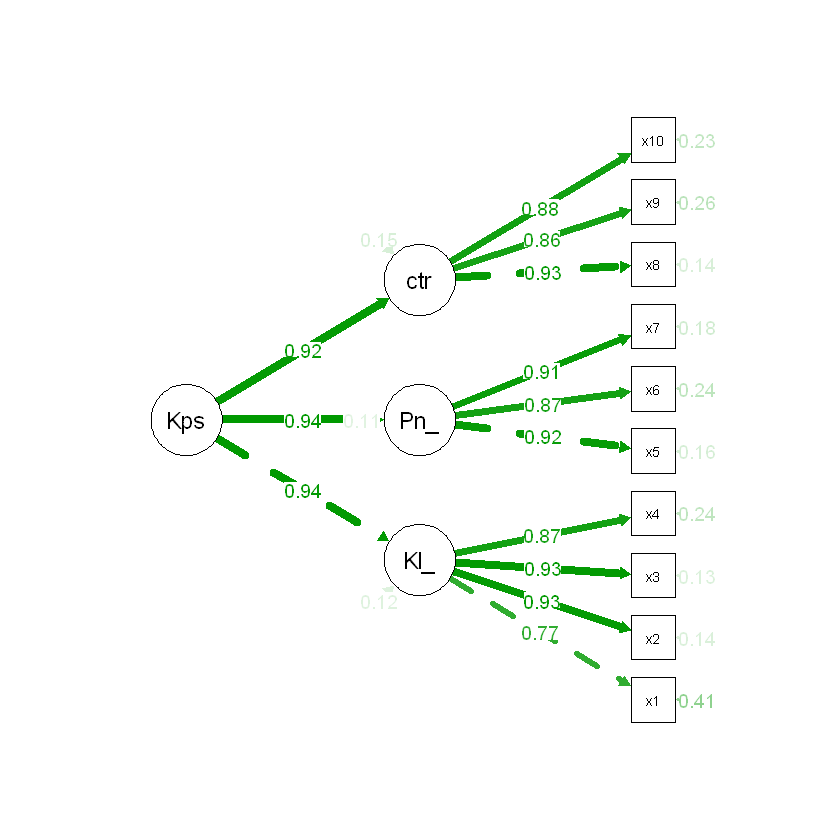

In [10]:
library(semPlot)
semPaths(fit.CFA,whatLabels="est.std",style="lisrel",residuals=TRUE, edge.label.cex=1, layout = "tree", rotation = 2, what = "std")

In [ ]:
#help("semPaths")

#### 1. Uji normal multivariat
    
    H0 : Data mengikuti sebaran distribusi normal multivariat.
    
    H1 : Data tidak mengikuti sebaran distribusi normal multivariat.

    Pada kasus sebelumnya menyimpulkan data tidak berdistribusi normal multivariat, dalam suatu penelitian diharapkan    asumsi tersebut terpenuhi.
    
#### 2. Identifikasi Model

    2.1  Model Unidentified (df < 0) : Model memiliki estimasi tidak unik dan estimasi hanya dapat dilakukan jika nilai              satu/beberapa parameter telah ditetapkan (predefined) terlebih dahulu. 

    2.2  Model Just-Identified (df = 0) : Model memiliki derajat bebas nol, hasil estimasi unik dan tepat, tidak ada                kemungkinan menolak model.

    2.3  Model Overidentified (df > 0) : memungkinkan model untuk dapat ditolak, **model dengan kondisi seperti ini adalah            model yang diinginkan**.
    
    Perhitungan df = Jumlah Observasi - Jumlah Parameter yang diestimasi, jumlah observasi = [K *(K+1)]/2 dimana nilai K adalah banyaknya indikator baik indikator pada variabel laten eksogen maupun endogen, maka jumlah observasi = (10(10+1)) / 2 = 55. Jumlah parameter yang dienstimasi = jumlah parameter loading faktor + error pada indikator + parameter antar variabel laten, sehingga jumlah parameter yang diestimasi = 10 + 10 + 3 = 23. Maka df = 55 -23 = 32. Jika dilihat dari output R maka dapat diketahui sebagai berikut : 
![image](https://user-images.githubusercontent.com/36166387/79945809-d57f3300-8498-11ea-81b6-5d0388e08452.png)


**3. Pengujian Hipotesis pada model pengukuran / measurement model**

   Hipotesis :

   H0 : $\lambda_{jk}$ = 0

   H1 : $\lambda_{jk}$ ≠ 0

   Statistik Uji :	t = $\lambda_{jk}$ / se($\lambda_{jk}$) 

    Hasil diatas menunjukkan bahwa estimasi nilai loading (lihat output : Std.all) pada masing-masing variabel laten adalah valid karena memiliki nilai loading faktor terstandarisasi (Std.all) diatas 0,5, dan dikatakan signifikan karena nilai P(>|z|) masing-masing indikator < alpha = 0,05. Maka dapat disimpulkan bahwa masing-masing indikator valid dan signifikan dalam merepresentasikan variabel latennya. 

    **Catatan : Yang diperhatikan adalah pengaruh variabel laten terhadap indikatornya. Apakah indikator valid dan signifikan dalam membentuk variabel laten.**

#### 4. Reliabilitas : 
    Berdasarkan pada nilai alpha (output reliabilitas) didapatkan nilai reliabilitas > 0,7  sehingga dapat disimpulkan semua variabel laten memiliki reliabilitas yang baik.

#### 5. Pengaruh antar variabel laten / model struktural : 

    Berdasarkan output dapat diketahui bahwa variabel laten yang memiliki kontribusi terbesar dalam merepresentasikan variabel laten kepuasan nasabah adalah penanganan komplain dengan nilai $R^2$ sebesar 0.889, kemudian diikuti dengan variabel laten kualitas layanan dengan nilai $R^2$ sebesar 0.878 dan citra/image dengan nilai $R^2$ sebesar 0.852. 

In [ ]:
#help("fitMeasures")

In [19]:
# Uji Kesesuaian model
fitMeasures(fit.CFA, c("chisq", "df", "pvalue", "cfi", "rmsea", "tli", "gfi"))

chisq     df pvalue    cfi  rmsea    tli    gfi 
37.350 32.000  0.237  0.996  0.037  0.994  0.940

**6. Uji Kesesuaian model**

H0 : $\sum$ = $\sum(\theta)$  (matriks varian-kovarian populasi/observasi sama dengan matriks varian-kovarian model    yang diestimasi)
    
H1 : $\sum$ ≠ $\sum(\theta)$ (matriks varian-kovarian populasi/observasi tidak sama dengan matriks varian-kovarian model yang diestimasi).
    
    Pengujian Goodness of fit atau kebaikan model berdasarkan nilai CFI diketahui sebesar 0,996 dan TLI sebesar 0.994, nilai probabilitas sebesar 0,237 dan RMSEA = 0.037 < 0,08 sehingga dapat dikatakan bahwa model baik karena lebih dari nilai cut off 0,95. Pada output R anda juga dapat menggunakan kriteria RMSEA atau Probabilitas 

**7. Modification Index**

	Menurut Joreskog (1993, dalam Brown 2006, hal.123) merekomendasikan bahwa model yang dimodifikasi dimulai dengan bebas mengestimasi parameter tertentu atau parameter konstrain yang memiliki nilai modification index paling tinggi. Jika pada kenyataannya tidak ada parameter yang memiliki modification index tertinggi, maka pertimbangkanlah untuk memilih parameter yang memiliki modification index terbesar kedua.
    
    Modifikasi indeks digunakan untuk meningkatkan ukuran kebaikan suatu model / goodness of fit, akan tetapi pada saat dilakukan modifikasi disarankan memperhatikan konseptual teori yang membentuk pengaruh antar dalam variabel laten.